In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

### Loading Dataset

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
feature_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

### Selecting features

In [5]:
X = df[feature_col]
Y = df.Outcome #Target variable

### Splitting Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=16)
#75% : to train
#25 %: to test
#random_state : to select records randomly, to help maintain consistant result

### Model development and Prediction

In [7]:
logreg = LogisticRegression(random_state=16) #classifier object

logreg.fit(X_train, y_train) #model training

predict = logreg.predict(X_test) #model prediction

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Evaluation using Confusion Matrix

In [9]:
cnf = metrics.confusion_matrix(y_test, predict)
cnf

array([[116,   9],
       [ 26,  41]])

### Visualizing the Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

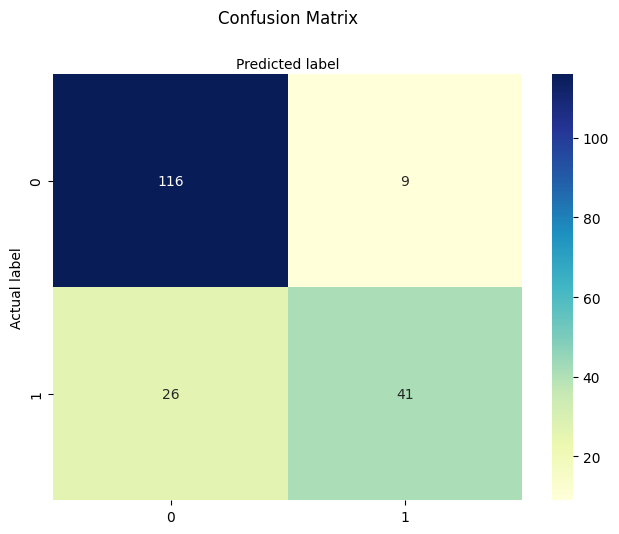

In [17]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf) , annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

# import required modules
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

### Evaluation Metrics

In [21]:
target_names = ["Without diabeties", "With diabeties"]
print(classification_report(y_test, predict, target_names = target_names))

                   precision    recall  f1-score   support

Without diabeties       0.82      0.93      0.87       125
   With diabeties       0.82      0.61      0.70        67

         accuracy                           0.82       192
        macro avg       0.82      0.77      0.78       192
     weighted avg       0.82      0.82      0.81       192

